In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the CSV files
df1 = pd.read_csv('Customers.csv')
df2 = pd.read_csv('Products.csv')
df3 = pd.read_csv('Transactions.csv')

print(df1.head())
print(df2.head())
print(df3.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

In [30]:
print('df1 number of rows and columns: ', df1.shape)
print('df2 number of rows and columns: ', df2.shape)
print('df3 number of rows and columns: ', df3.shape)

df1 number of rows and columns:  (200, 4)
df2 number of rows and columns:  (100, 4)
df3 number of rows and columns:  (1000, 7)


In [31]:
# Merge dataframes on a common column
merged_df = pd.merge(df1, df3, on='CustomerID')
merged_df = pd.merge(merged_df, df2, on='ProductID')

# Check the merged data
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price_x          1000 non-null   float64
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


In [32]:
print(merged_df.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [33]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price_x          1000 non-null   float64
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


In [34]:
# Check for missing values
print(merged_df.isnull().sum())


CustomerID         0
CustomerName       0
Region             0
SignupDate         0
TransactionID      0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [35]:
# Summary statistics
print(merged_df.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [36]:
# Data types
print(merged_df.dtypes)

CustomerID          object
CustomerName        object
Region              object
SignupDate          object
TransactionID       object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
ProductName         object
Category            object
Price_y            float64
dtype: object


<Axes: xlabel='Price_y', ylabel='count'>

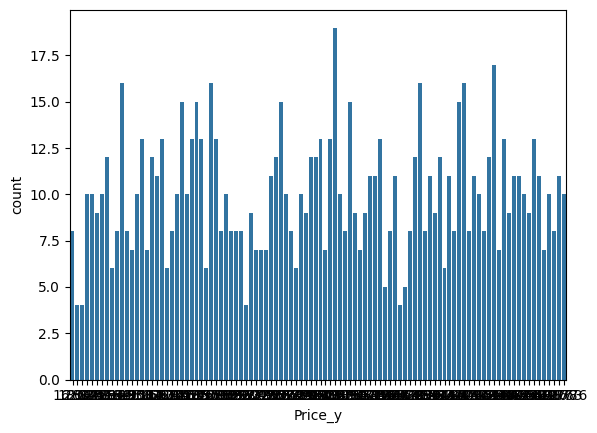

In [37]:
# Distribution of Transaction price Price_y variable
sns.countplot(data=merged_df, x='Price_y')

In [38]:
correlation_matrix = merged_df.corr(numeric_only=True)
print(correlation_matrix)

            Quantity  TotalValue   Price_x   Price_y
Quantity    1.000000    0.609972 -0.009378 -0.009378
TotalValue  0.609972    1.000000  0.722714  0.722714
Price_x    -0.009378    0.722714  1.000000  1.000000
Price_y    -0.009378    0.722714  1.000000  1.000000


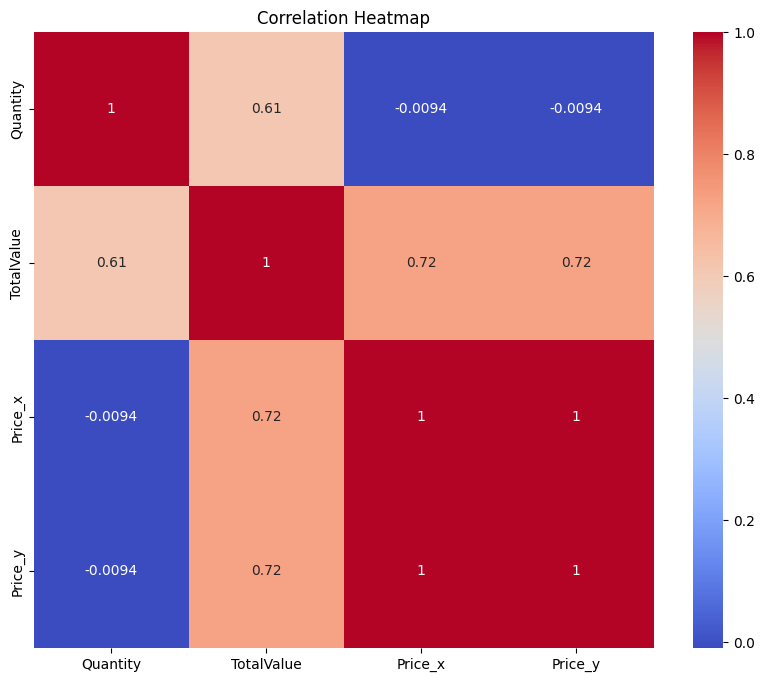

In [39]:
# Correlation heatmap
numerical_df = merged_df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()